### Exploring Titanic Dataset

In [230]:
import pandas as pd
import numpy as np

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [232]:
titanic_train = pd.read_csv('../Datasets/titanic_train.csv')

In [197]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Finding the missing values in dataFrame & EDA

In [198]:
titanic_train.isnull().sum()/len(titanic_train)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

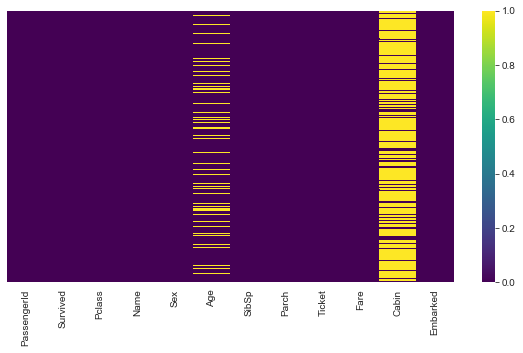

In [199]:
plt.figure(figsize=(10,5))
sns.heatmap(titanic_train.isnull(),cmap='viridis',yticklabels=False)

In [200]:
sns.set_style('whitegrid')

#### Number of male died is more than females

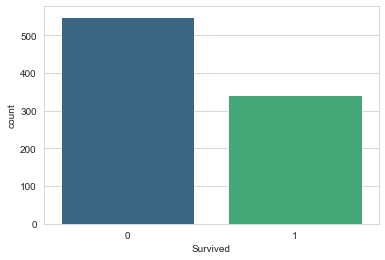

In [201]:
sns.countplot(x='Survived',data = titanic_train,palette = 'viridis')

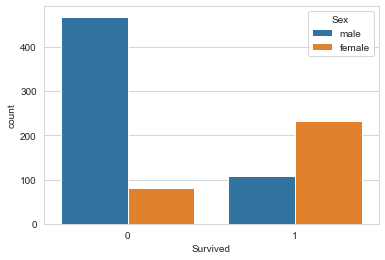

In [202]:
sns.countplot(x='Survived',data = titanic_train,hue='Sex')

### PClass tells us that lower people died more 

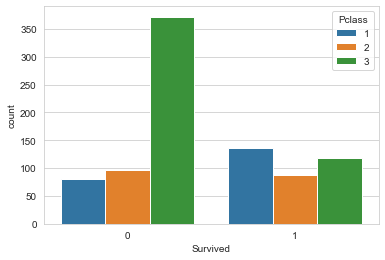

In [203]:
sns.countplot(x='Survived',data = titanic_train,hue='Pclass')

In [204]:
# plt.figure(figsize=(10,5))
# sns.heatmap(titanic_train.corr(),annot=True,linewidths=1,linecolor='white',cmap ='coolwarm')

### Young people b/w 18-40 boarded more than any other age group

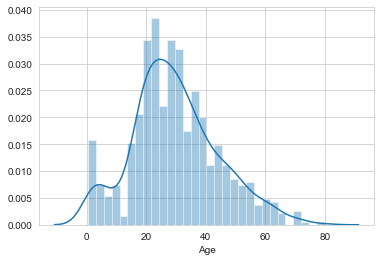

In [205]:
sns.distplot(titanic_train['Age'],bins=30)

### Most of the people are single

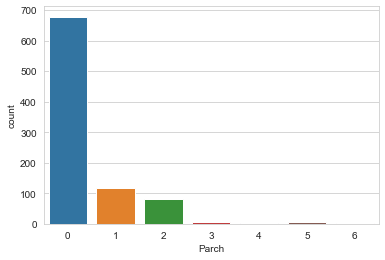

In [206]:
sns.countplot(x='Parch',data =titanic_train)

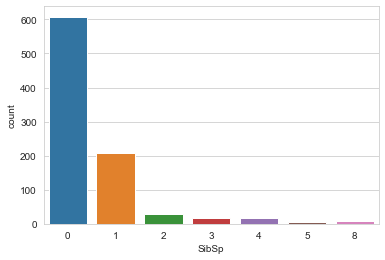

In [207]:
sns.countplot(x='SibSp',data =titanic_train)

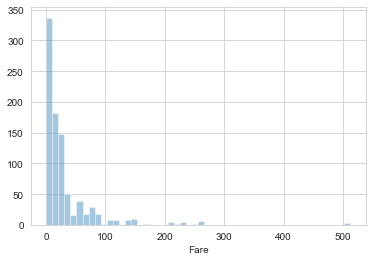

In [208]:
sns.distplot(titanic_train['Fare'],kde=False)

----
## Handling the missing value

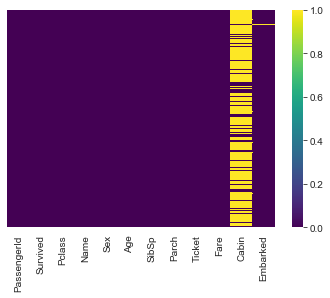

In [237]:
sns.heatmap(titanic_train.isnull(),yticklabels=False,cmap='viridis')


### Imputing Age Column

In [210]:
titanic_train.isnull().sum()/len(titanic_train)*100   # age has missing value around 19%

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

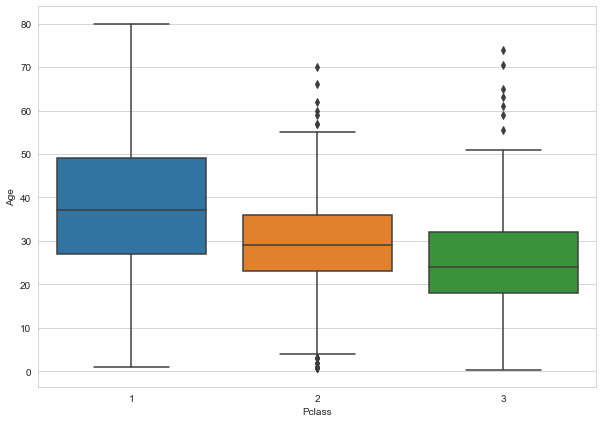

In [211]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=titanic_train) # we can impute the age as per the class of the passenger

In [234]:
def fillMissingAge(col):
    Age    = col[0]
    Pclass = col[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        if Pclass == 3:
            return 25
    else:
        return Age

In [235]:
titanic_train['Age'] = titanic_train[['Age','Pclass']].apply(fillMissingAge,axis=1)

In [236]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Since cabin columns have more than 77% data missing we can drop that entire column

In [238]:
titanic_train.drop(columns='Cabin',axis=1,inplace= True)

### Imputing Embarked Column

In [239]:
titanic_train['Embarked'].isnull().sum()  # since only 2 rows have missing value , we can simply drop those rows

2

In [240]:
titanic_train.dropna(inplace = True) # drop rows which have null values

In [241]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Encoding categorical   (One hot encoding)

In [242]:
pd.get_dummies(titanic_train['Sex'])  # Issue of multicollinearity because machine learning algo will immediately
                                      # predict that if female contains 0 and 1 will definately be male

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [243]:
sex = pd.get_dummies(titanic_train['Sex'],drop_first=True) # new dataframe sex

In [244]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [245]:
embarked = pd.get_dummies(titanic_train['Embarked'],drop_first=True)

## Dropping unneccesary columns

In [246]:
titanic_train.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis =1,inplace = True)

In [247]:
titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [248]:
titanic_train = pd.concat([titanic_train,sex,embarked],axis=1)

In [249]:
titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Model training

In [250]:
titanic_train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [251]:
X = titanic_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]

In [252]:
y = titanic_train['Survived']

In [253]:
from sklearn.model_selection import train_test_split

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [255]:
from sklearn.linear_model import LogisticRegression

In [256]:
lrm = LogisticRegression()

In [257]:
lrm.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [259]:
predictions = lrm.predict(X_test)

### Evaluate the model

In [263]:
from sklearn.metrics import accuracy_score

In [265]:
accuracy_score(y_test,predictions)*100

80.33707865168539

In [266]:
from sklearn.metrics import classification_report


In [268]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       214
           1       0.76      0.74      0.75       142

    accuracy                           0.80       356
   macro avg       0.80      0.79      0.79       356
weighted avg       0.80      0.80      0.80       356

